In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score,classification_report,consensus_score,completeness_score
from sklearn.naive_bayes import GaussianNB
import plotly.animation as animation
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/BBCA.JK_weekly  new.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4.777.533.203.125,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,473.654.345.703.125,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,505.079.443.359.375,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,500.525.146.484.375,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,500.980.517.578.125,461434500
...,...,...,...,...,...,...,...
261,2024-01-01,9400.0,9625.0,9325.0,9575.0,9575.0,257836400
262,2024-01-08,9600.0,9750.0,9550.0,9725.0,9725.0,308657900
263,2024-01-15,9700.0,9775.0,9525.0,9625.0,9625.0,339669000
264,2024-01-22,9450.0,9600.0,9300.0,9350.0,9350.0,319444600


In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Volume
Open,1.000000,0.992360,0.994275,0.987949,-0.085928
High,0.992360,1.000000,0.991695,0.994091,-0.036478
Low,0.994275,0.991695,1.000000,0.994520,-0.125682
Close,0.987949,0.994091,0.994520,1.000000,-0.086703
Volume,-0.085928,-0.036478,-0.125682,-0.086703,1.000000


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,266.000000,266.000000,266.000000,266.000000,2.660000e+02
mean,7136.071429,7293.853383,7004.436090,7151.428571,3.923531e+08
std,1298.477003,1293.111248,1306.385645,1307.604474,1.733313e+08
min,4450.000000,4960.000000,4325.000000,4430.000000,7.897730e+07
25%,6050.000000,6210.000000,5980.000000,6070.000000,2.871146e+08
50%,6825.000000,6980.000000,6677.500000,6820.000000,3.642262e+08
75%,8375.000000,8618.750000,8218.750000,8418.750000,4.614306e+08
max,9700.000000,9775.000000,9550.000000,9725.000000,1.209648e+09


In [ ]:
df.interpolate()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4.777.533.203.125,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,473.654.345.703.125,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,505.079.443.359.375,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,500.525.146.484.375,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,500.980.517.578.125,461434500
...,...,...,...,...,...,...,...
261,2024-01-01,9400.0,9625.0,9325.0,9575.0,9575.0,257836400
262,2024-01-08,9600.0,9750.0,9550.0,9725.0,9725.0,308657900
263,2024-01-15,9700.0,9775.0,9525.0,9625.0,9625.0,339669000
264,2024-01-22,9450.0,9600.0,9300.0,9350.0,9350.0,319444600


In [ ]:
df.value_counts()

Date        Open    High    Low     Close   Adj Close            Volume   
2018-12-31  5200.0  5325.0  5115.0  5245.0  4.777.533.203.125    233217000    1
2022-06-27  7300.0  7400.0  7000.0  7050.0  685.227.099.609.375  516917200    1
2022-03-21  7900.0  7950.0  7800.0  7900.0  756.253.076.171.875  406476700    1
2022-03-28  7875.0  8075.0  7825.0  7900.0  767.843.212.890.625  409199700    1
2022-04-04  7900.0  7900.0  7700.0  7725.0  750.833.984.375      368978500    1
                                                                             ..
2020-10-19  5880.0  5880.0  5705.0  5815.0  545.476.123.046.875  386592500    1
2020-10-26  5815.0  5830.0  5720.0  5820.0  5.459.451.171.875    240488500    1
2020-11-02  5840.0  6400.0  5785.0  6285.0  589.564.404.296.875  537911000    1
2020-11-09  6395.0  6600.0  6320.0  6480.0  607.856.396.484.375  542819000    1
2024-01-26  9400.0  9450.0  9300.0  9350.0  9350.0               78977300     1
Length: 266, dtype: int64

In [ ]:
df.unstack()

Date    0      2018-12-31
        1      2019-01-07
        2      2019-01-14
        3      2019-01-21
        4      2019-01-28
                  ...    
Volume  261     257836400
        262     308657900
        263     339669000
        264     319444600
        265      78977300
Length: 1862, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       266 non-null    object 
 1   Open       266 non-null    float64
 2   High       266 non-null    float64
 3   Low        266 non-null    float64
 4   Close      266 non-null    float64
 5   Adj Close  266 non-null    object 
 6   Volume     266 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 14.7+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# data visualization by using Matplotlib

Distribution  Graph

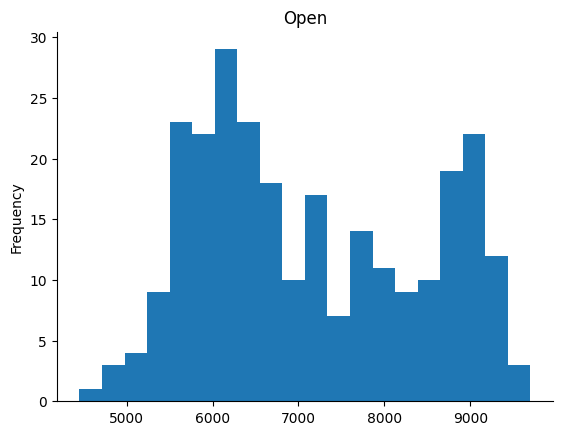

In [ ]:
from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

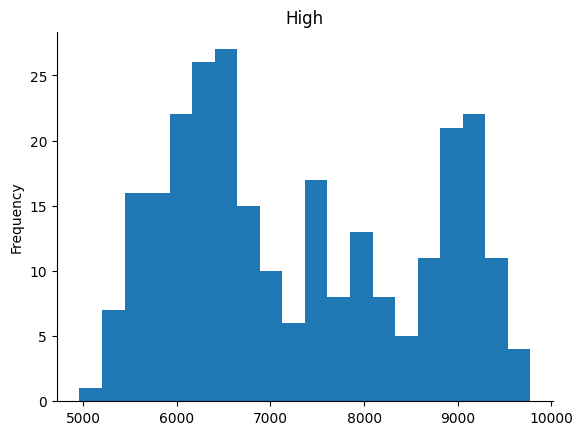

In [ ]:
from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

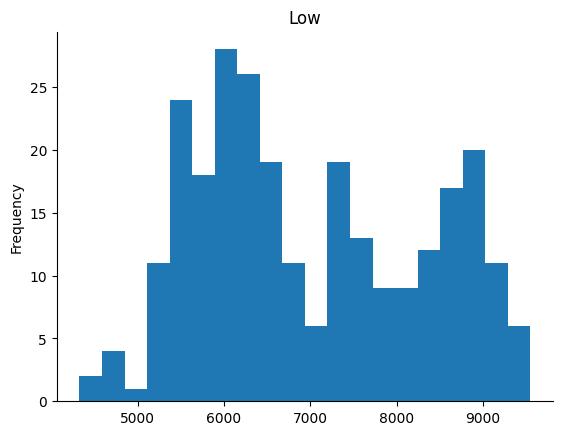

In [ ]:
from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

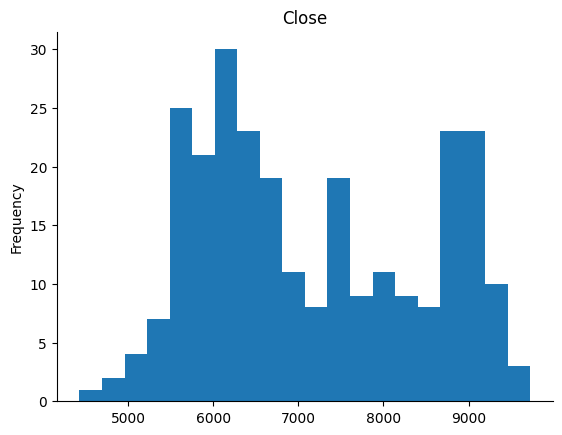

In [ ]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

2D- Distribusion Graph

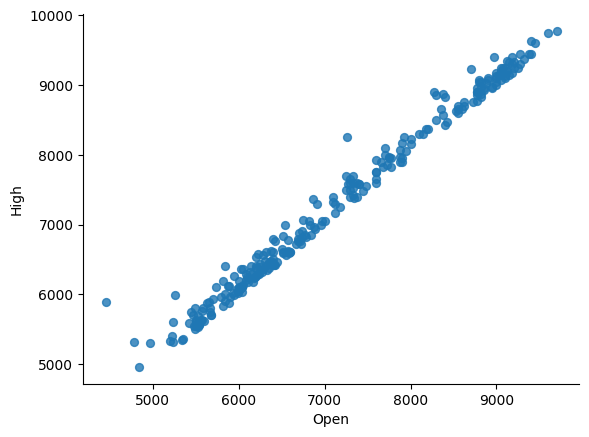

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

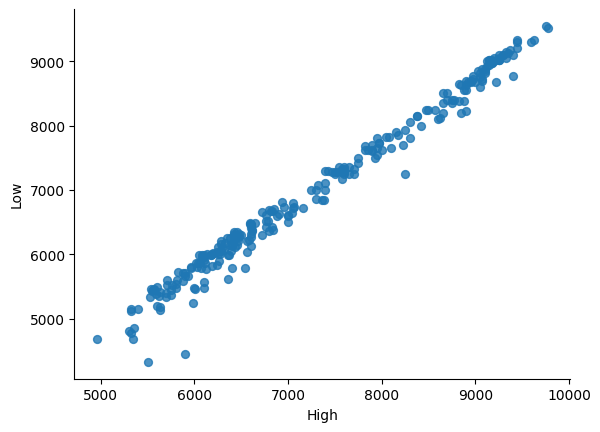

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

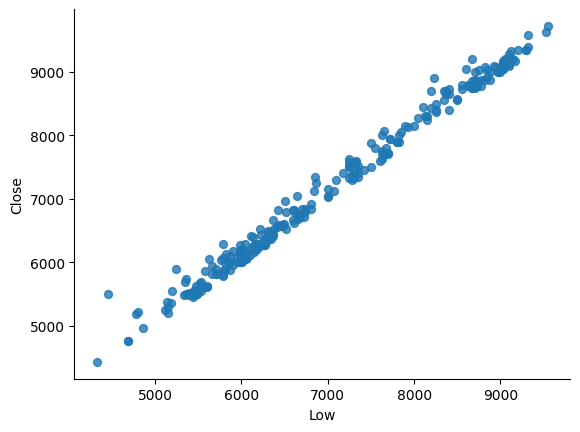

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

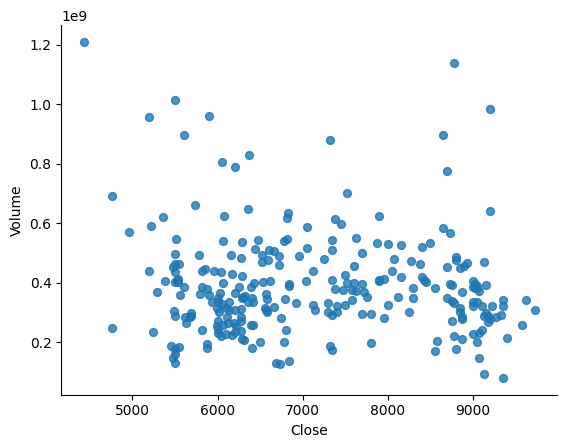

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Time Series Plot:**

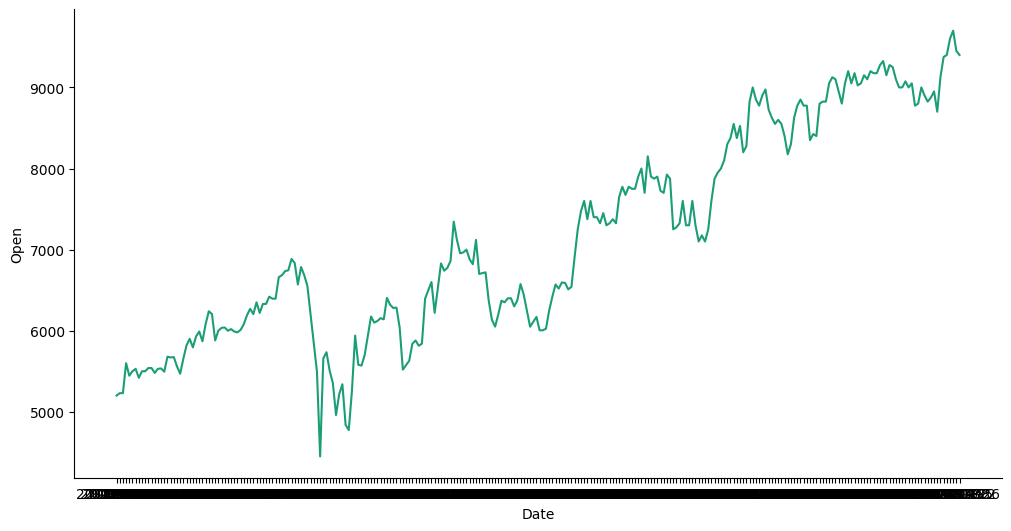

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

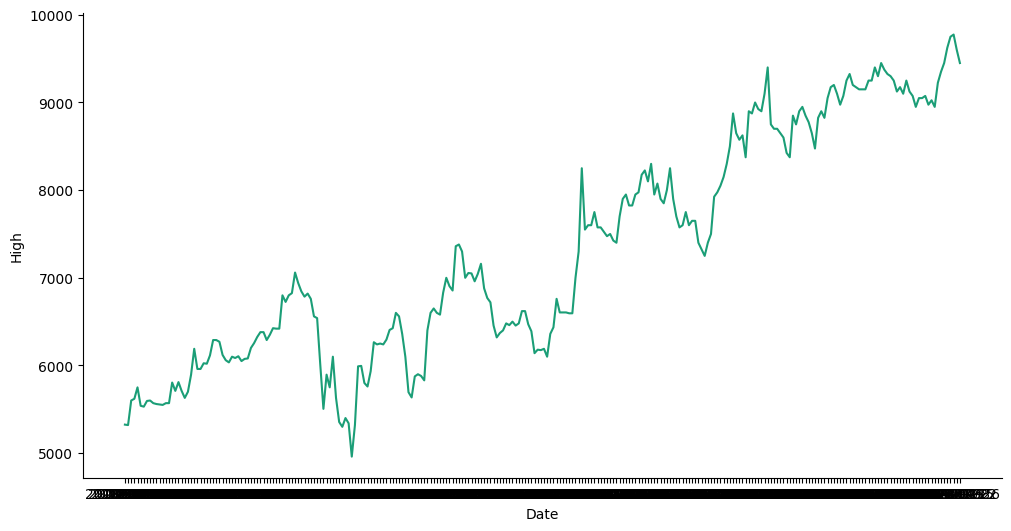

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

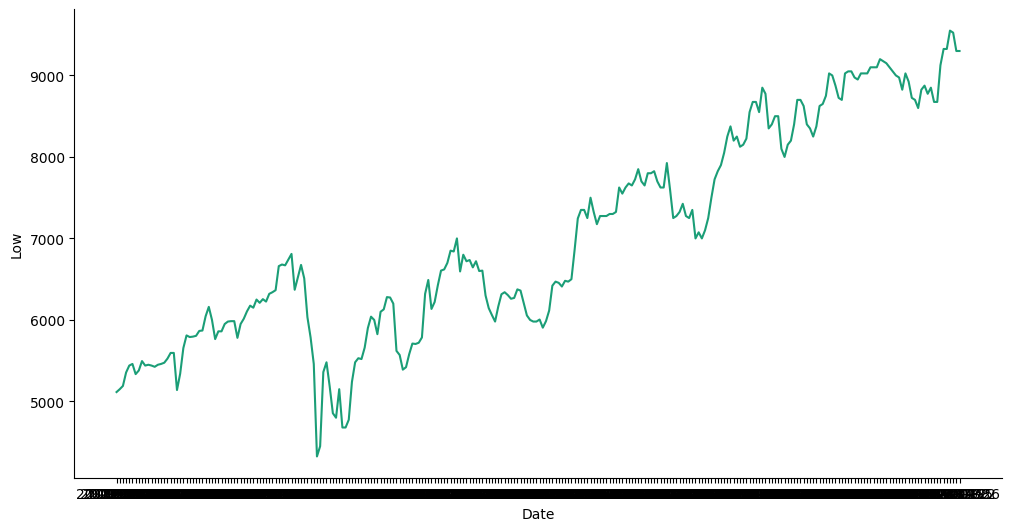

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

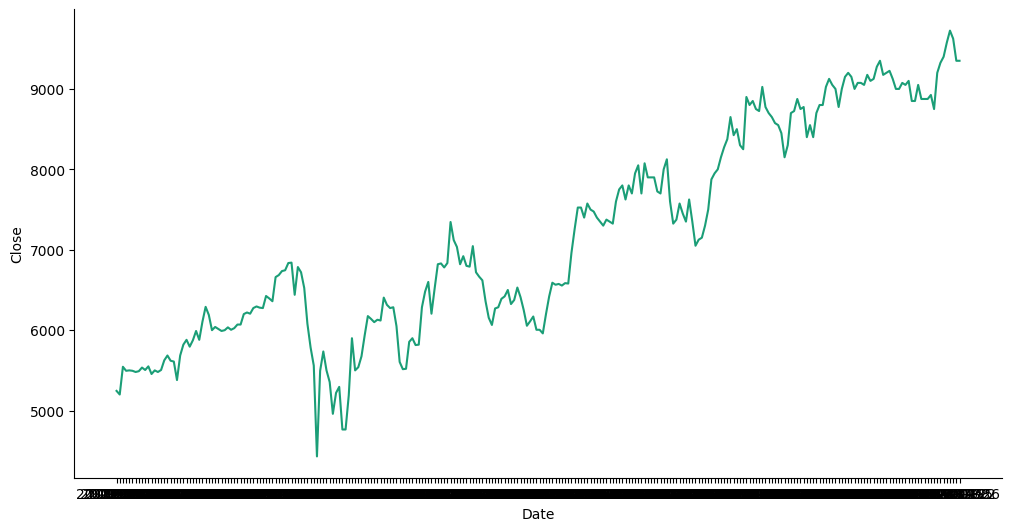

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

**Values Plot Graph**

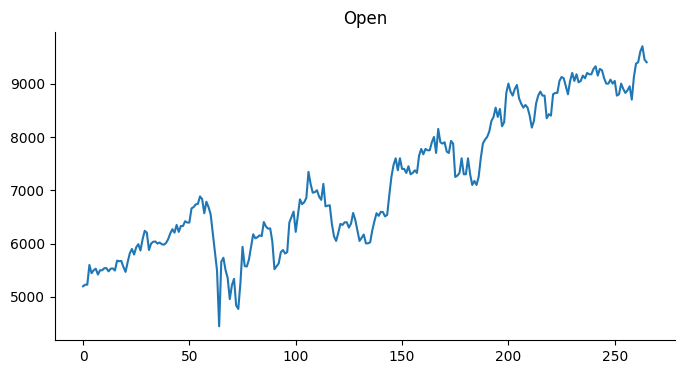

In [ ]:
from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

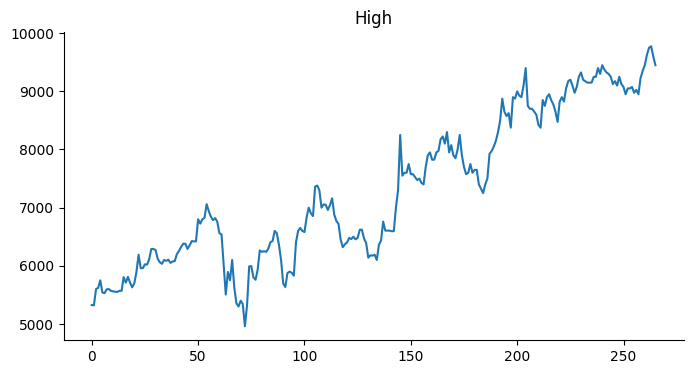

In [ ]:
from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

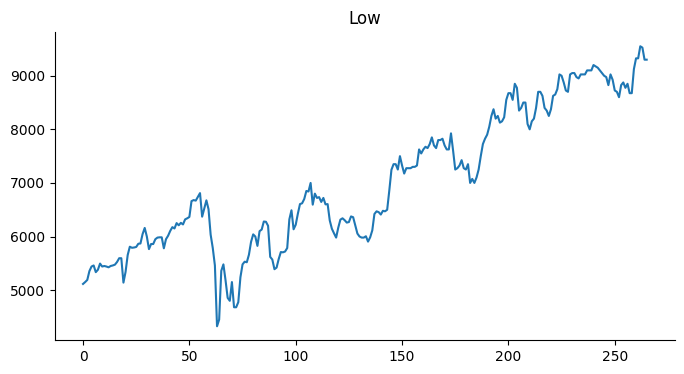

In [ ]:
from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

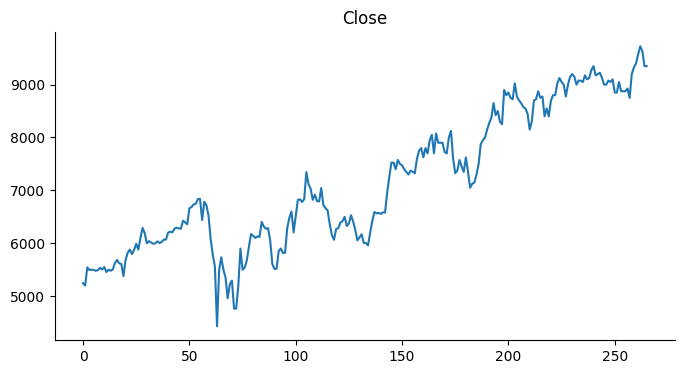

In [ ]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)


In [ ]:
# Seaborn Data Visualization

<Axes: >

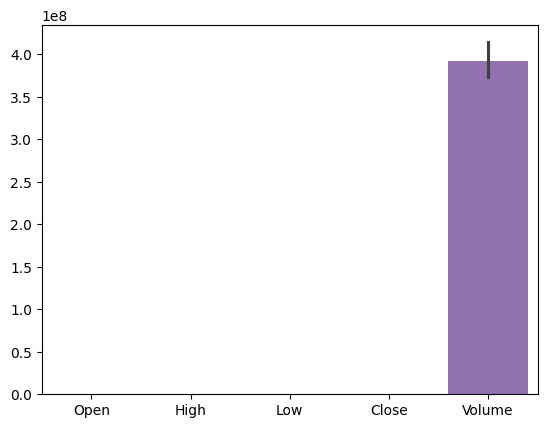

In [ ]:
sns.barplot(df)

<Axes: >

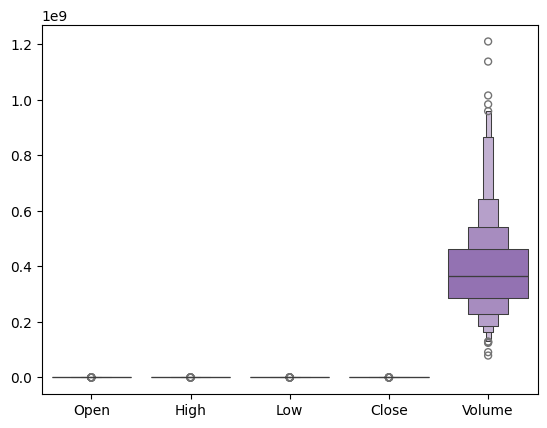

In [ ]:
sns.boxenplot(df)

<Axes: >

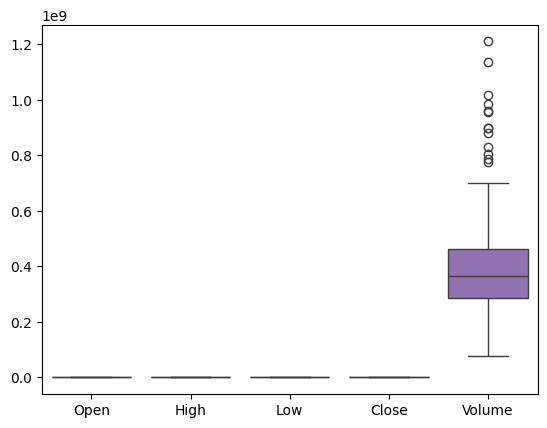

In [ ]:
sns.boxplot(df)

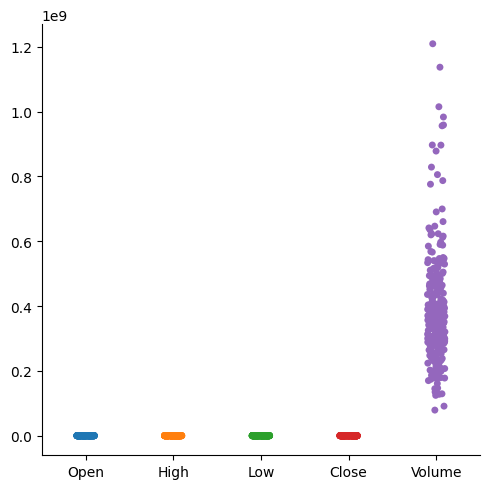

In [ ]:
sns.catplot(df)

<Axes: ylabel='count'>

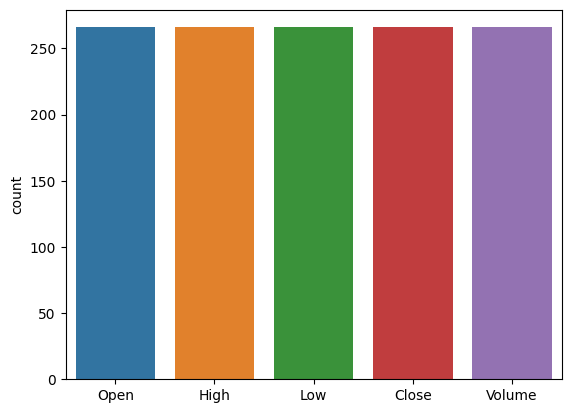

In [ ]:
sns.countplot(df)

<Axes: >

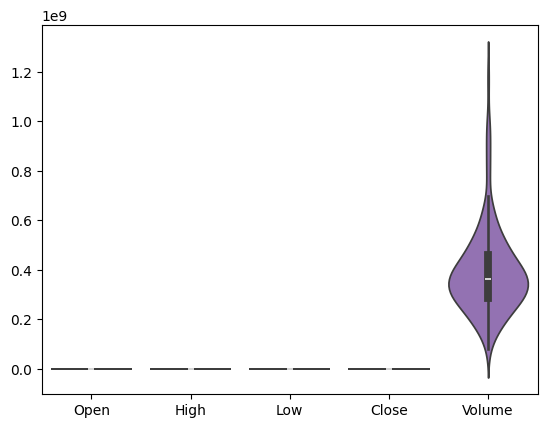

In [ ]:
sns.violinplot(df)

<Axes: >

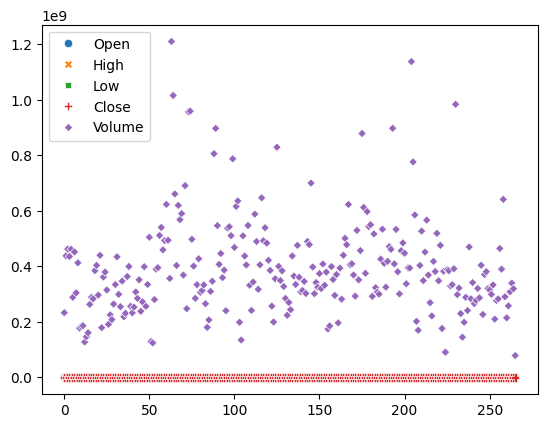

In [ ]:
sns.scatterplot(df)

<Axes: >

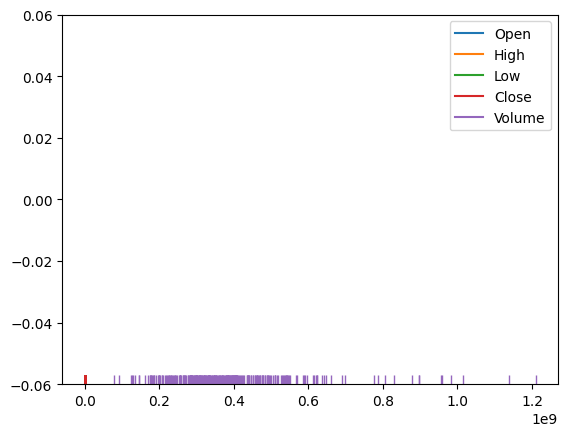

In [ ]:
sns.rugplot(df)

<Axes: >

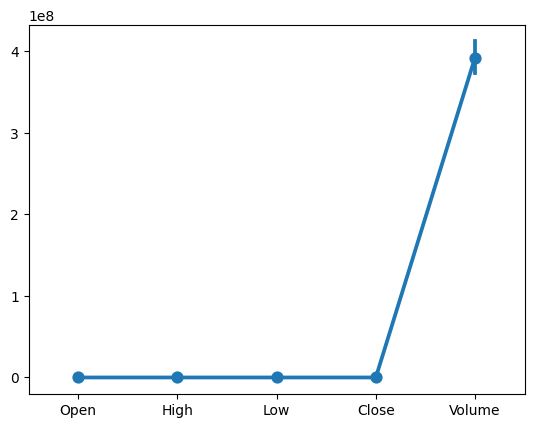

In [ ]:
sns.pointplot(df)

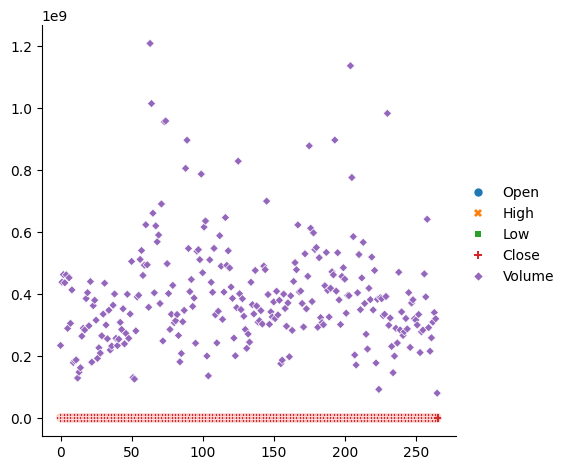

In [ ]:
sns.relplot(df)

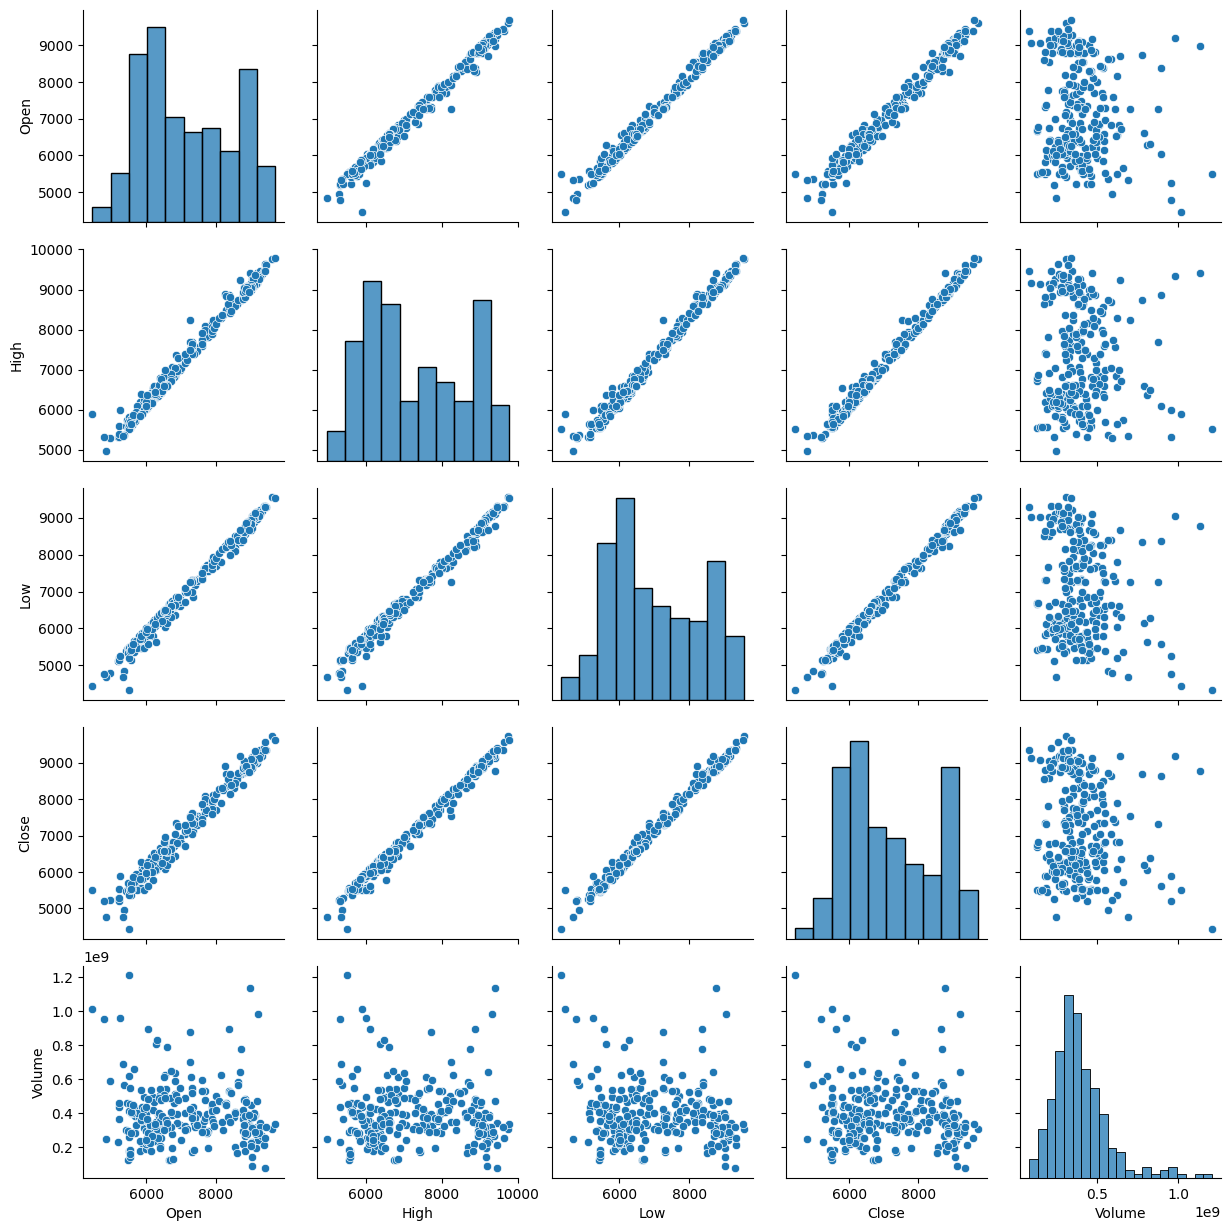

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Density'>

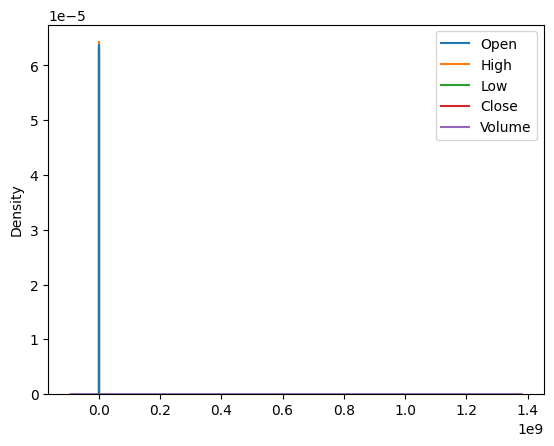

In [ ]:
sns.kdeplot(df)

<Axes: ylabel='Proportion'>

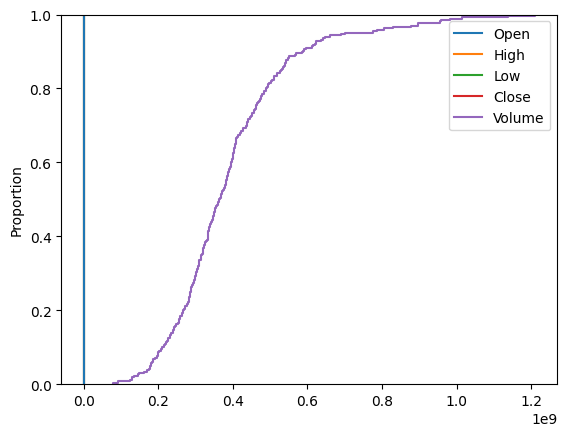

In [ ]:
sns.ecdfplot(df)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4.777.533.203.125,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,473.654.345.703.125,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,505.079.443.359.375,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,500.525.146.484.375,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,500.980.517.578.125,461434500


In [ ]:
#plotly visualization

In [ ]:
px.area(df, x="Close")

In [ ]:
px.bar(df, x="High")

In [ ]:
px.bar_polar(df)

In [ ]:
px.histogram(df, x="High")

In [ ]:
px.box(df, x="High" , y="Close")

In [ ]:
px.density_heatmap(df, x="Date", y="Open")

In [ ]:
px.density_contour(df, x="Low", y="High" , color="Open")

In [ ]:
px.ecdf(df , x="High", y="Close")

In [ ]:
px.funnel(df, x="High")

In [ ]:
px.line(df, x="Open")

In [ ]:
px.parallel_coordinates(df)

In [ ]:
px.scatter(df, x="High",y="Open")

In [ ]:
px.scatter_matrix(df)

In [ ]:
px.strip(df, x="High")

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"), 'Date', 'Open', 'High'],
                 values='Close', color='Low')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
px.violin(df, x="High")

In [ ]:
#Model building and model evaluation

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4.777.533.203.125,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,473.654.345.703.125,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,505.079.443.359.375,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,500.525.146.484.375,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,500.980.517.578.125,461434500


In [ ]:
# Convert 'Adj Close' column to numeric format
df['Adj Close'] = pd.to_numeric(df['Adj Close'].str.replace('.', ''), errors='coerce')

<ipython-input-63-5c482c193ac1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
# Extract features (X) and target variable (y)
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

In [ ]:
x

,Open,High,Low,Adj Close,Volume
0,5200.0,5325.0,5115.0,4777533203125,233217000
1,5230.0,5320.0,5150.0,473654345703125,437807000
2,5230.0,5600.0,5190.0,505079443359375,462381000
3,5600.0,5620.0,5355.0,500525146484375,435848500
4,5445.0,5750.0,5440.0,500980517578125,461434500
...,...,...,...,...,...
261,9400.0,9625.0,9325.0,95750,257836400
262,9600.0,9750.0,9550.0,97250,308657900
263,9700.0,9775.0,9525.0,96250,339669000
264,9450.0,9600.0,9300.0,93500,319444600


In [ ]:
y

0      5245.0
1      5200.0
2      5545.0
3      5495.0
4      5500.0
        ...  
261    9575.0
262    9725.0
263    9625.0
264    9350.0
265    9350.0
Name: Close, Length: 266, dtype: float64

In [ ]:
# train the model

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5,random_state=45)

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Fit the model on the training data
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Make prediction test data
ypred = model.predict(xtest)

In [ ]:
# Calculate R-squared score
r2 = r2_score(ytest, ypred)

print(f'R-squared Score: {r2}')

R-squared Score: 0.9938952276881182


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean R-squared Score:", np.mean(cv_scores))

Cross-validation Scores: [0.96624571 0.95591127 0.96462044 0.94642577 0.91393273]
Mean R-squared Score: 0.9494271858756683


In [ ]:
 from sklearn.metrics import accuracy_score
 #Create an SVC model
svc_model = SVC()

# Fit the model on the training data
svc_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_svc = svc_model.predict(xtest)

# Evaluate the model
accuracy_svc = accuracy_score(ytest, y_pred_svc)
print(f'Accuracy Score (SVC): {accuracy_svc}')

Accuracy Score (SVC): 0.03007518796992481


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix for clustering
# Ensure all columns are in numeric format
x_numeric = x.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values
x_numeric = x_numeric.dropna()

# Standardize the features
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_numeric)

# Create a KMeans model with the desired number of clusters (n_clusters)
kmeans_model = KMeans(n_clusters=3)

# Fit the model on the standardized data
kmeans_model.fit(x_standardized)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Access the cluster centers (if needed)
cluster_centers = kmeans_model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are your feature matrix and target variable for classification
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_nb = nb_model.predict(xtest)

# Evaluate the model
accuracy_nb = accuracy_score(ytest, y_pred_nb)
print(f'Accuracy Score (Gaussian Naive Bayes): {accuracy_nb}')

Accuracy Score (Gaussian Naive Bayes): 0.21052631578947367


In [ ]:
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_nb = nb_model.predict(xtest)

# Evaluate the model
accuracy_nb = accuracy_score(ytest, y_pred_nb)
print(f'Accuracy Score (Gaussian Naive Bayes): {accuracy_nb}')

Accuracy Score (Gaussian Naive Bayes): 0.21052631578947367


In [ ]:
 #Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model on the training data
gb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_gb = gb_model.predict(xtest)

# Evaluate the model
accuracy_gb = accuracy_score(ytest, y_pred_gb)
print(f'Accuracy Score (Gradient Boosting): {accuracy_gb}')

Accuracy Score (Gradient Boosting): 0.09774436090225563


In [ ]:
from sklearn.metrics import silhouette_score
# Ensure all columns are in numeric format
X_numeric = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values
X_numeric = X_numeric.dropna()

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_numeric)

# Create a KMeans model with the desired number of clusters (n_clusters)
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model on the standardized data
kmeans_model.fit(X_standardized)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Use silhouette_score to evaluate the clustering performance
silhouette_avg = silhouette_score(X_standardized, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# You can also access other properties like cluster centers and inertia
cluster_centers = kmeans_model.cluster_centers_
inertia = kmeans_model.inertia_

print(f'Cluster Centers:\n{cluster_centers}')
print(f'Inertia (Within-Cluster Sum of Squares): {inertia}')

Silhouette Score: 0.42103244622042557
Cluster Centers:
[[-0.55399059 -0.56020567 -0.55554121  1.27071356  0.02874565]
 [ 1.21113123  1.21470574  1.20182889 -0.75978662 -0.05445233]
 [-0.65486684 -0.65106005 -0.64256155 -0.7460686   0.02463272]]
Inertia (Within-Cluster Sum of Squares): 496.95595030288956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_dt = dt_model.predict(xtest)

# Evaluate the model
accuracy_dt = accuracy_score(ytest, y_pred_dt)
print(f'Accuracy Score (Decision Tree): {accuracy_dt}')

# You can also print the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Accuracy Score (Decision Tree): 0.05263157894736842
Classification Report:
              precision    recall  f1-score   support

      4430.0       0.00      0.00      0.00         0
      4765.0       0.00      0.00      0.00         1
      5190.0       0.00      0.00      0.00         1
      5200.0       0.00      0.00      0.00         1
      5220.0       0.00      0.00      0.00         1
      5245.0       0.00      0.00      0.00         1
      5355.0       0.00      0.00      0.00         1
      5455.0       0.00      0.00      0.00         0
      5480.0       0.00      0.00      0.00         1
      5490.0       0.00      0.00      0.00         0
      5495.0       0.00      0.00      0.00         2
      5500.0       0.50      0.50      0.50         2
      5505.0       0.00      0.00      0.00         0
      5515.0       0.00      0.00      0.00         0
      5520.0       0.00      0.00      0.00         1
      5535.0       0.00      0.00      0.00         0
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create the dt_model instance:
dt_model = DecisionTreeClassifier()

In [ ]:
# Instantial the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model,param_grid=param_grid, cv=3)
grid_search.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Use the best model for prediction
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(xtest)


In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(ytest, y_pred_dt)
print(f'Accuracy Score (Decision Tree): {accuracy_dt}')


Accuracy Score (Decision Tree): 0.03007518796992481


In [ ]:
print(xtrain.isnull().sum())  # Check for NaN values
print(xtrain.isin([np.inf, -np.inf]).sum())

Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#Print the shape of xtrain and ytrain to ensure they have the correct dimensions:

In [ ]:
print(xtrain.shape)
print(ytrain.shape)


(133, 5)
(133,)


In [ ]:
#Check the data types of xtrain and ytrain:rint(xtrain.dtypes)
print(ytrain.dtypes)

float64


In [ ]:
#if ytrain is a string or categorical variable, consider encoding it into numerical values using LabelEncoder:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)


In [ ]:
#Print the unique values of ytrain to understand the nature of the target variable:
print(ytrain.unique())

[8800. 9175. 8700. 7350. 9075. 5380. 5515. 7725. 9000. 7625. 6275. 6480.
 7035. 6665. 8250. 6055. 9100. 6315. 7500. 9050. 6200. 8400. 6685. 6735.
 7950. 7875. 6580. 6395. 5960. 7400. 5900. 8775. 4765. 5545. 5295. 7900.
 8650. 5500. 5795. 9400. 5935. 8925. 5490. 7120. 8850. 5505. 5685. 6285.
 5610. 9150. 8725. 8375. 6100. 5495. 6050. 6840. 6410. 5855. 6525. 8900.
 6390. 7345. 6080. 8875. 9350. 6105. 6780. 5880. 6600. 8550. 9625. 6790.
 7255. 6835. 4430. 9025. 6500. 5675. 6360. 6420. 5455. 6205. 6820. 5480.
 7525. 8575. 8000. 7300. 8050. 6040. 6005. 6440. 7750. 6530. 6800. 8300.
 9200. 5620. 5875. 6325. 7700. 6555. 5535. 8750. 6065. 6785. 5735. 5625.
 4960. 5820. 6015. 6170.]


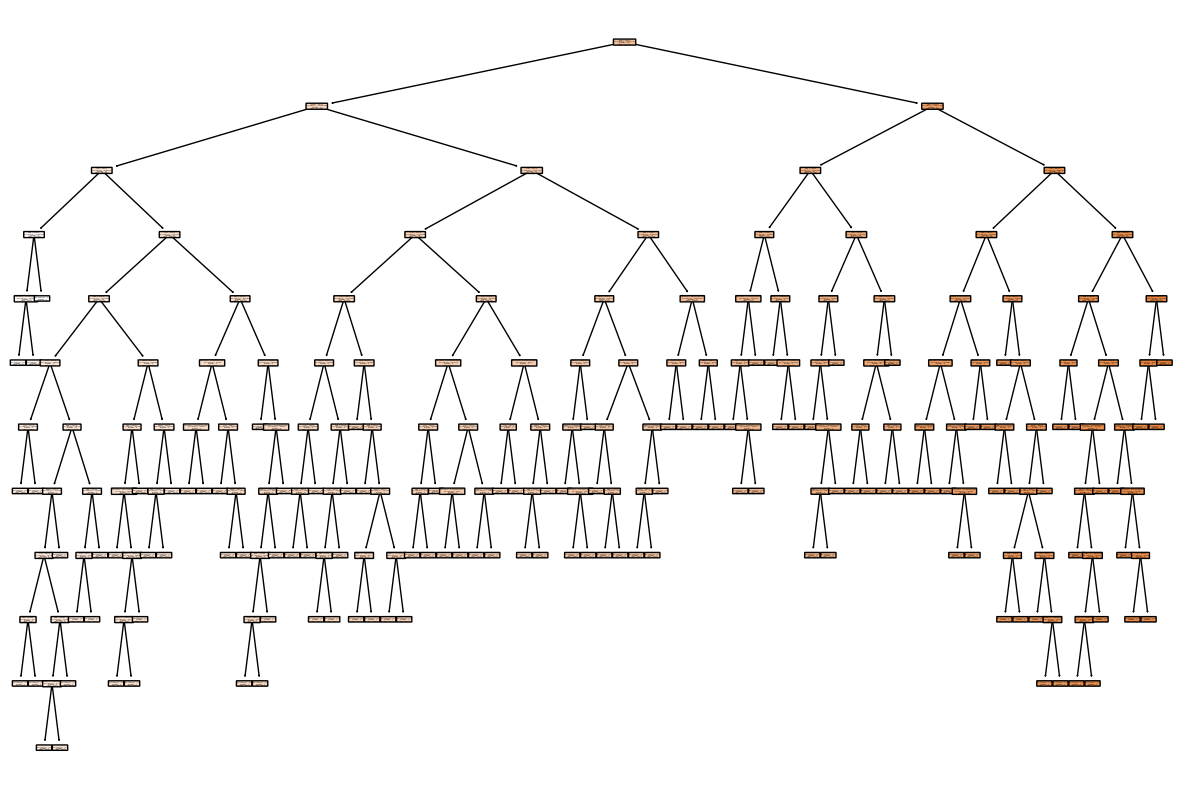

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Create a decision tree regressor
dt_model = DecisionTreeRegressor()

# Fit the model on the training data
dt_model.fit(xtrain, ytrain)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=xtrain.columns, filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus

# Create a decision tree regressor
dt_model = DecisionTreeRegressor()

# Fit the model on the training data
dt_model.fit(xtrain, ytrain)

# Visualize the decision tree and save it as a PNG file
dot_data = export_graphviz(dt_model, out_file=None, feature_names=xtrain.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")

True

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

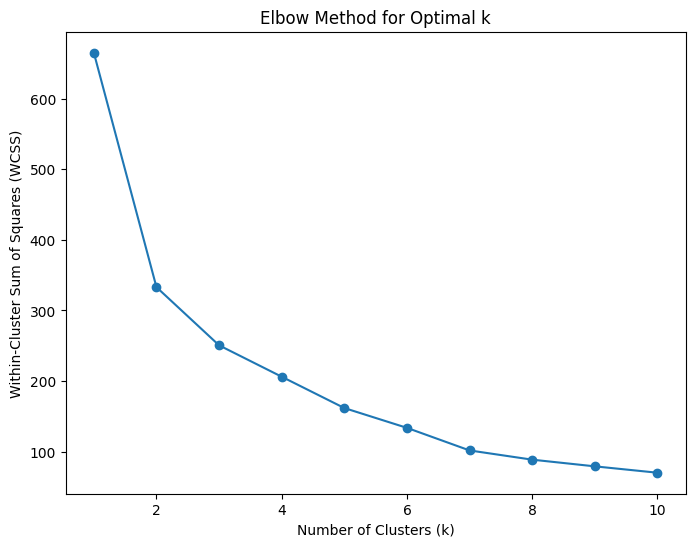

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming xtrain is your feature data
# You may need to preprocess your data, for example, by scaling it
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Initialize a list to store the within-cluster sum of squares (WCSS) for different k values
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(xtrain_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()